Cell 1: Import & Load

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust relative path to find the data
df = pd.read_csv('../data/churn_data.csv')

# Drop columns that clearly don't predict behavior (RowNumber, CustomerId, Surname)
# Why? A surname like "Smith" doesn't cause you to leave a bank.
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

df.head()

Matplotlib is building the font cache; this may take a moment.


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Cell 2: check for "Class Imbalance" (Critical Step) Why: If 90% of users stayed and only 10% left, our model might just guess "Stay" every time and be 90% accurate but useless.

Exited
0    7963
1    2037
Name: count, dtype: int64


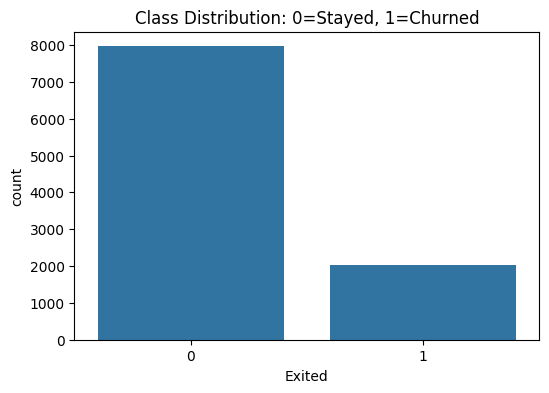

In [2]:
# Count how many people stayed (0) vs left (1)
churn_counts = df['Exited'].value_counts()
print(churn_counts)

# Visualize it
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df)
plt.title("Class Distribution: 0=Stayed, 1=Churned")
plt.show()

Cell 3: The "Correlation Matrix" Why: We want to see which numerical factors (Age, Balance, Score) correlate most strongly with 'Exited'.

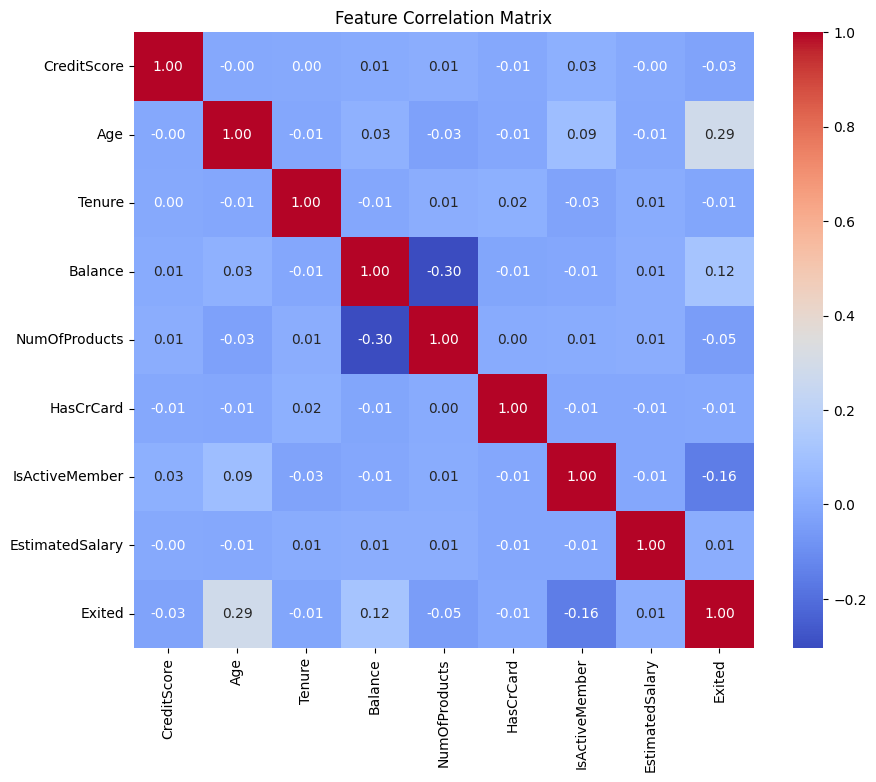

In [3]:
# Calculate correlations
corr = df.select_dtypes(include=['number']).corr()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

Cell 4: Categorical Analysis (Geography) Why: Maybe one specific country has a bad customer service team causing churn?

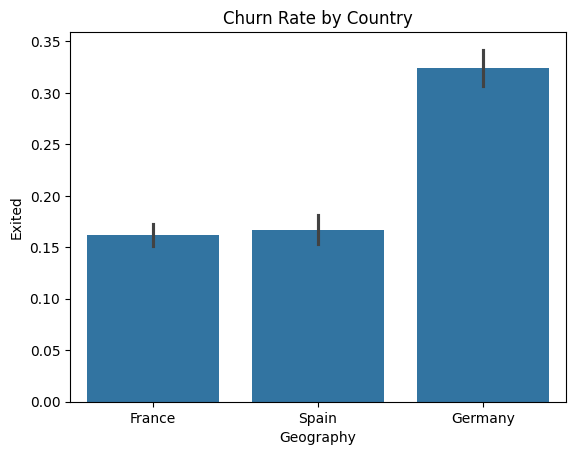

In [4]:
# Compare churn rate by Geography
sns.barplot(x='Geography', y='Exited', data=df)
plt.title("Churn Rate by Country")
plt.show()